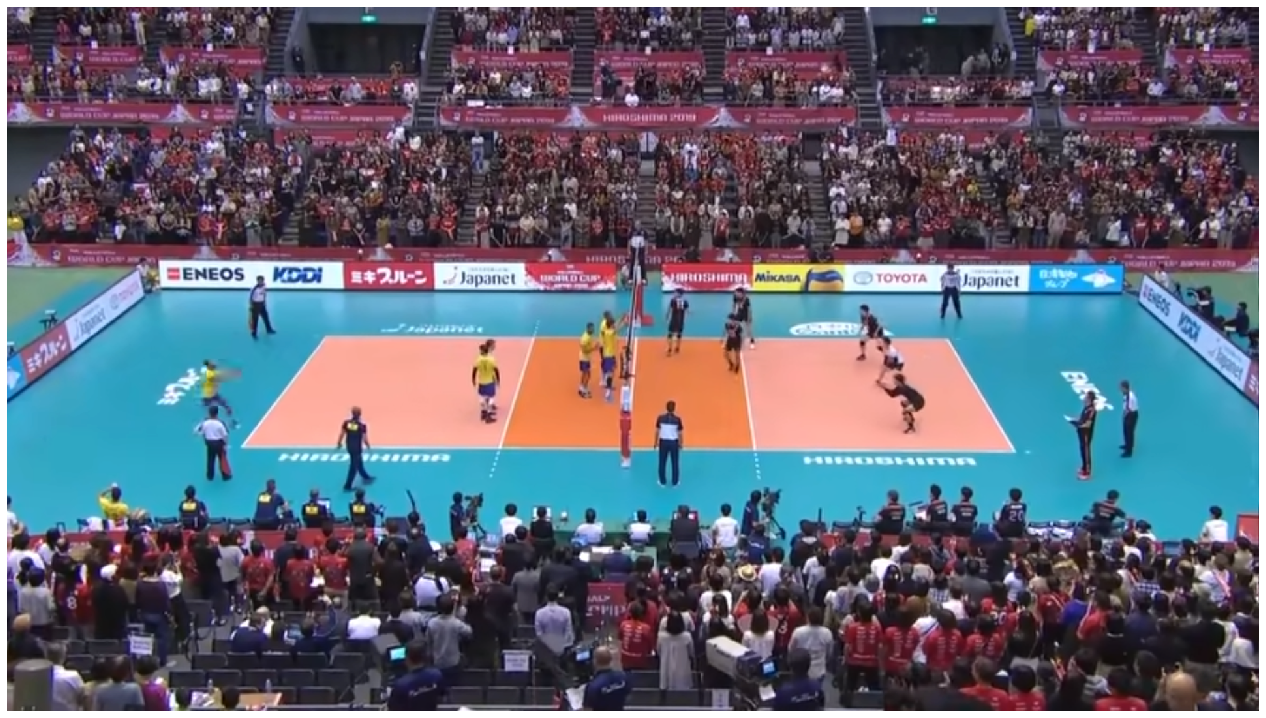

In [45]:
#Obrazek
import skimage as ski
from skimage import data,io,img_as_float
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(20, 20))
x=plt.subplot(2, 1, 1)
x.axis('off')
img = img_as_float(data.imread('field.png'))
io.imshow(img)



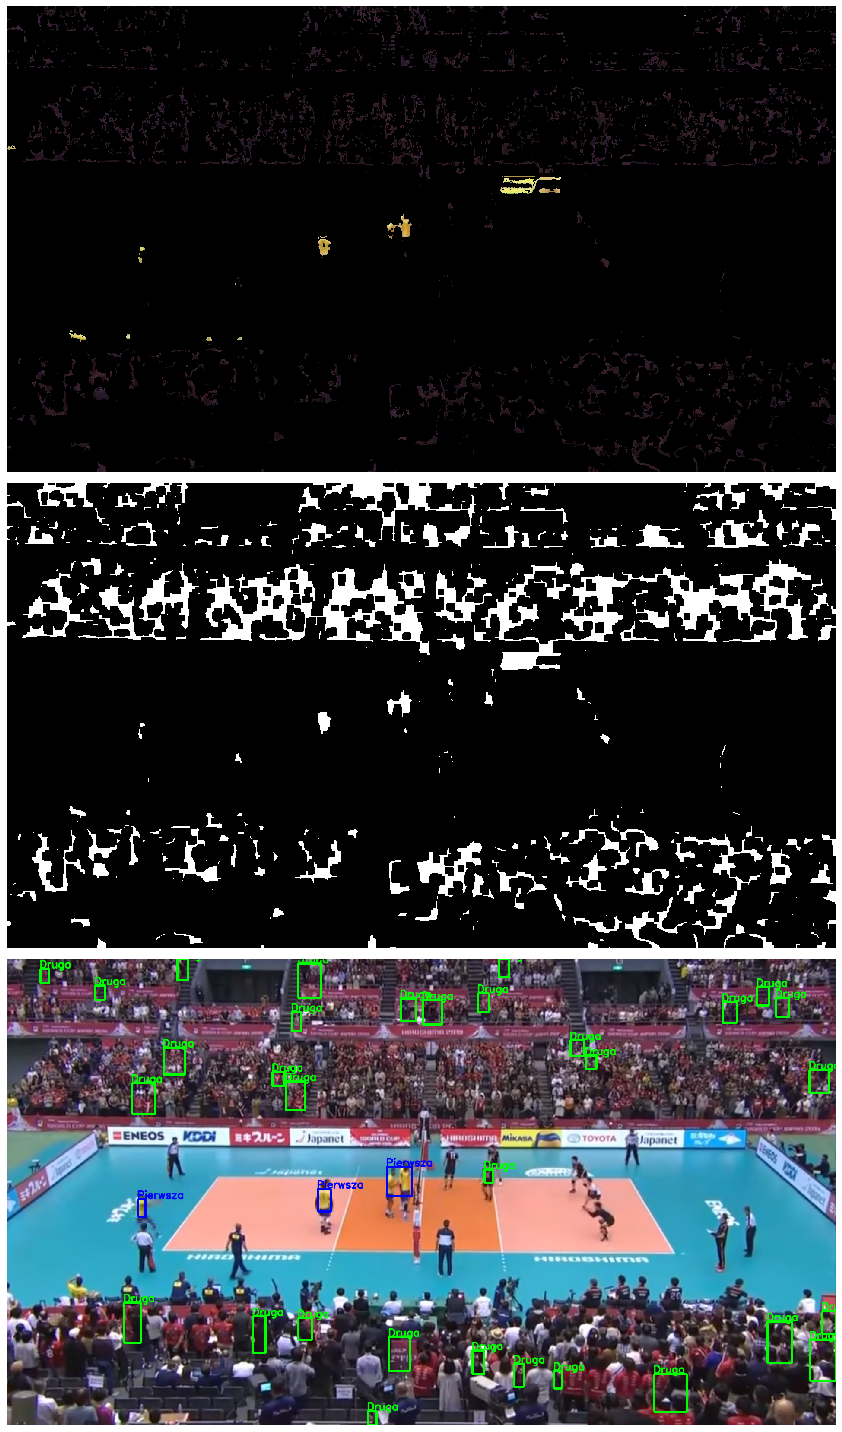

In [44]:
# Główny program
import numpy as np
import cv2
import opencv_wrapper as cvw
import skimage as ski
from skimage import data,io,img_as_float
import matplotlib.pyplot as plt
#tylko do notebooka
%matplotlib inline 
plt.figure(figsize=(20, 20))
sp=plt.subplot(3, 1, 1)
sp.axis('off')

img = cv2.imread('field.jpg') 
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
idx=0    
#converting into hsv image
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)



lowerLimit= []
upperLimit= []


#stare, ręcznie robione

'''colortable = []
colortable.append([230,200,100])
colortable.append([10,0,10])
colortable.append([230,130,80])
colortable.append([100,170,190])
colortable.append([250,170,160])
colortable.append([230,240,250])
colortable.append([255,255,255])
for colorbgr in colortable:
    color = np.uint8([[colorbgr]]) 
    hsvcolor = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    lowerLimit.append([hsvcolor[0][0][0] - 10, 100, 100])
    upperLimit.append([hsvcolor[0][0][0] + 10, 255, 255])
'''
#Manual HSV limits for colors, first two are colors of shirts of both teams
lowerLimit.append([16, 72, 164] )
upperLimit.append([36, 204, 239])
lowerLimit.append([141, 73, 27] )
upperLimit.append( [179, 140, 63])
#Background 
lowerLimit.append([0, 77, 241])
upperLimit.append([8, 109, 265])
lowerLimit.append([6, 156, 218])
upperLimit.append([13, 185, 258])
lowerLimit.append([92, 123, 167])
upperLimit.append([102, 215, 230])
lowerLimit.append([87, 9, 242])
upperLimit.append([179, 56, 265])
lowerLimit.append([171, 153, 128])
upperLimit.append( [182, 197, 217])
lowerLimit.append([2, 36, 175])
upperLimit.append( [104, 132, 265])




#Define a mask ranging from lower to uppper
mask = 0
#Combining masks
#lowerlimit[x] upperlimit[x]
#x = 0 || 1 => team colors
#x > 1 => background (hopefully won't be needed)
for i in range(0,2):
    maskpart = cv2.inRange(hsv, np.array(lowerLimit[i]), np.array(upperLimit[i]))
    mask += maskpart
#Do masking
res = cv2.bitwise_and(img, img, mask=mask)
#convert to hsv to gray
res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)


io.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))  
#Defining a kernel to do morphological operation in threshold image to get better output
kernel = np.ones((13,13),np.uint8)
thresh = cv2.threshold(res_gray,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

sp=plt.subplot(3, 1, 2)
sp.axis('off')
io.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

#find contours in threshold image     
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


prev = 0
font = cv2.FONT_HERSHEY_SIMPLEX
#Countour processing
for c in contours:
		x,y,w,h = cv2.boundingRect(c)
		
		#Detect players
		if(h>=(1.1)*w):
			if(100>w>15 and 150>h>= 30):
				idx = idx+1
				player_img = img[y:y+h,x:x+w]
				player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
				#First set
				maskfirst = cv2.inRange(player_hsv, np.array(lowerLimit[0]), np.array(upperLimit[0]))
				res1 = cv2.bitwise_and(player_img, player_img, mask=maskfirst)
				res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
				res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
				nzCount = cv2.countNonZero(res1)
				#Second set
				masksecond = cv2.inRange(player_hsv, np.array(lowerLimit[1]), np.array(upperLimit[1]))
				res2 = cv2.bitwise_and(player_img, player_img, mask=masksecond)
				res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
				res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
				nzCountred = cv2.countNonZero(res2)

				if(nzCount >= 20):
					#Mark first
					cv2.putText(img, 'Pierwsza', (x-2, y-2), font, 0.8, (255,0,0), 2, cv2.LINE_AA)
					cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
				else:
					pass
				if(nzCountred>=20):
					#Mark second
					cv2.putText(img, 'Druga', (x-2, y-2), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
					cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
				else:
					pass
sp=plt.subplot(3, 1, 3)
sp.axis('off')
io.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [42]:
#Szukanie kolorków w zakresach HSV

import numpy as np
import cv2


colors = []

def on_mouse_click (event, x, y, flags, frame):
    if event == cv2.EVENT_LBUTTONUP:
        colors.append(frame[y,x].tolist())


#capture = cv2.VideoCapture(0)

while True:
    frame = cv2.imread('field.jpg') 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    if colors:
        cv2.putText(hsv, str(colors[-1]), (10, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 2)
    cv2.imshow('frame', frame)
    cv2.setMouseCallback('frame', on_mouse_click, hsv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#capture.release()
cv2.destroyAllWindows()

# avgb = int(sum(c[0] for c in colors) / len(colors))
# avgg = int(sum(c[0] for c in colors) / len(colors))
# avgr = int(sum(c[0] for c in colors) / len(colors))
# print avgb, avgg, avgr

#zakres powiększony by żyło się lepiej
minb = min(c[0] for c in colors) -3
ming = min(c[1] for c in colors) -10
minr = min(c[2] for c in colors) -10
maxb = max(c[0] for c in colors) +3
maxg = max(c[1] for c in colors) +10
maxr = max(c[2] for c in colors) +10
print (minr, ming, minb, maxr, maxg, maxb)
lb = [minb,ming,minr]
ub = [maxb,maxg,maxr]
print (lb, ub)

27 73 141 63 140 179
[141, 73, 27] [179, 140, 63]
